In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Global_Cybersecurity_Threats_2015-2024.csv')

In [3]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [4]:
df.shape

(3000, 10)

In [5]:

df.dtypes


Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object

In [6]:
df.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [8]:
df['Country'].unique()

array(['China', 'India', 'UK', 'Germany', 'France', 'Australia', 'Russia',
       'Brazil', 'Japan', 'USA'], dtype=object)

In [9]:
df['Attack Type'].unique()

array(['Phishing', 'Ransomware', 'Man-in-the-Middle', 'DDoS',
       'SQL Injection', 'Malware'], dtype=object)

In [10]:
print("\n\n2. UNIQUE VALUES IN OBJECT COLUMNS")
print("=" * 60)

for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\nColumn: {col}")
    print(f"Unique Values ({len(unique_vals)}):")
    print(unique_vals)




2. UNIQUE VALUES IN OBJECT COLUMNS

Column: Country
Unique Values (10):
['China' 'India' 'UK' 'Germany' 'France' 'Australia' 'Russia' 'Brazil'
 'Japan' 'USA']

Column: Year
Unique Values (10):
[2019 2017 2024 2018 2016 2023 2022 2015 2021 2020]

Column: Attack Type
Unique Values (6):
['Phishing' 'Ransomware' 'Man-in-the-Middle' 'DDoS' 'SQL Injection'
 'Malware']

Column: Target Industry
Unique Values (7):
['Education' 'Retail' 'IT' 'Telecommunications' 'Government' 'Banking'
 'Healthcare']

Column: Financial Loss (in Million $)
Unique Values (2536):
[80.53 62.19 38.65 ... 32.97 32.17 48.2 ]

Column: Number of Affected Users
Unique Values (2998):
[773169 295961 605895 ... 734737 379954 480984]

Column: Attack Source
Unique Values (4):
['Hacker Group' 'Nation-state' 'Insider' 'Unknown']

Column: Security Vulnerability Type
Unique Values (4):
['Unpatched Software' 'Weak Passwords' 'Social Engineering' 'Zero-day']

Column: Defense Mechanism Used
Unique Values (5):
['VPN' 'Firewall' 'AI-b

In [12]:
# Count attack types
attack_counts = df['Attack Type'].value_counts()

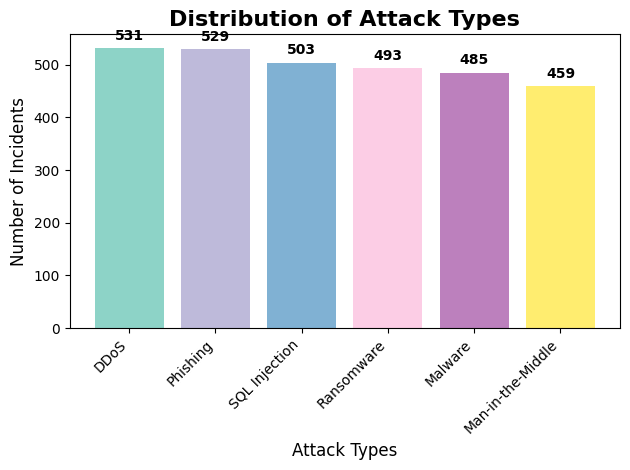

In [13]:
# Plot
colors = plt.cm.Set3(np.linspace(0, 1, len(attack_counts)))
bars = plt.bar(attack_counts.index, attack_counts.values, color=colors)

# Titles and labels
plt.title('Distribution of Attack Types', fontsize=16, fontweight='bold')
plt.xlabel('Attack Types', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02*max(attack_counts.values),
             f"{int(bar.get_height())}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [14]:
df_processed = df.copy()

In [15]:
numerical_cols = [
    'Financial_Loss_in_Million_USD',
    'Number_of_Affected_Users',
    'Incident_Resolution_Time_in_Hours'
]

In [16]:
for col in numerical_cols:
    if col in df_processed.columns:
        negative_count = (df_processed[col] < 0).sum()
        if negative_count > 0:
            print(f"⚠ Found {negative_count} negative values in {col}")
            df_processed[col] = df_processed[col].clip(lower=0)

## Feature engineering

In [17]:
df_processed['Year_normalized'] = (
    (df_processed['Year'] - df_processed['Year'].min()) / 
    (df_processed['Year'].max() - df_processed['Year'].min())
)

df_processed['Years_since_2015'] = df_processed['Year'] - 2015


In [18]:
# --- Financial impact categories ---
df_processed['Financial_Impact_Category'] = pd.cut(
    df_processed['Financial_Loss_in_Million_USD'], 
    bins=[0, 10, 50, 100, float('inf')], 
    labels=['Low', 'Medium', 'High', 'Critical']
)

# --- User impact categories ---
df_processed['User_Impact_Category'] = pd.cut(
    df_processed['Number_of_Affected_Users'], 
    bins=[0, 100_000, 1_000_000, 10_000_000, float('inf')], 
    labels=['Small', 'Medium', 'Large', 'Massive']
)

# --- Resolution efficiency ---
df_processed['Resolution_Efficiency'] = pd.cut(
    df_processed['Incident_Resolution_Time_in_Hours'], 
    bins=[0, 24, 72, 168, float('inf')], 
    labels=['Fast', 'Normal', 'Slow', 'Very_Slow']
)

KeyError: 'Financial_Loss_in_Million_USD'